## Projet Deep Learning II - RBM

In [1]:
from models.RBM import RBM
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
def lire_alpha_digit(data,L):
    X=data['dat'][L[0]]
    for i in range(1,len(L)) :
        X_bis=data['dat'][L[i]]
        X=np.concatenate((X,X_bis),axis=0)
    n=X.shape[0]
    X=np.concatenate(X).reshape((n,320))
    return X

In [3]:
def display_images(images, size):
    for img in images:
        img_reshaped = img.reshape(size)
        plt.figure()
        plt.imshow(img_reshaped, cmap='gray')
        plt.show()

#### Import de la donnée

In [4]:
data = scipy.io.loadmat('./data/binaryalphadigs.mat')
size_img = data['dat'][0][0].shape

X = lire_alpha_digit(data, [2, 3])

In [5]:
X.shape

(78, 320)

#### RBM

In [6]:
# Configuration RBM

pixels = size_img[0] * size_img[1]  # Nombre de pixels dans chaque image
n_hidden = 100 # Nombre de neurones dans la couche cachée
num_iterations = 100 # Nombre d'itérations
learning_rate = 0.02 # Taux d'apprentissage
batch_size = 10 # Taille du batch
num_images = 5 # Nombre d'images à afficher

In [7]:
 # Initialisation du RBM avec les dimensions appropriées
rbm = RBM(pixels, n_hidden)

In [8]:
# Entrainer le RBM
rbm.train_RBM(data=X, learning_rate=learning_rate, batch_size=batch_size, epochs=num_iterations, verbose=False)

#### Donnée générée après 100 itérations

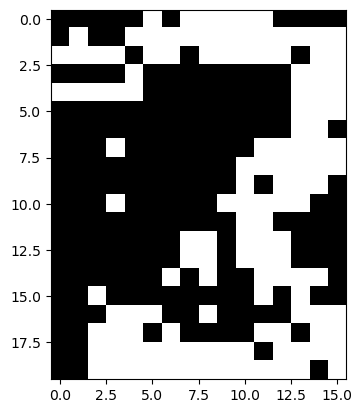

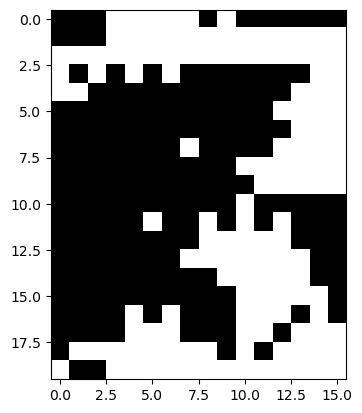

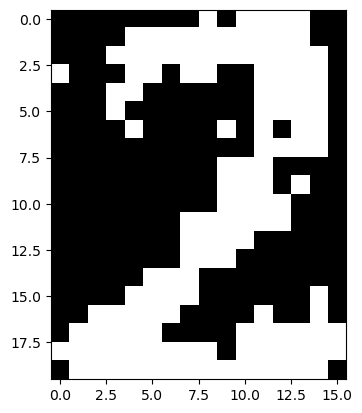

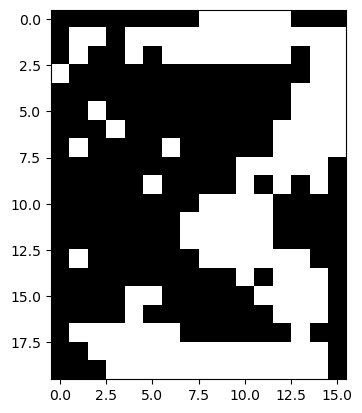

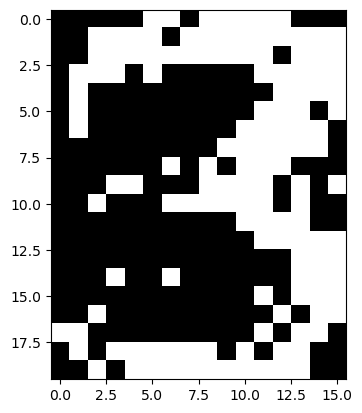

In [9]:
# Générer des images
images = rbm.generer_image_RBM(num_images=num_images, num_iterations=num_iterations, image_size=size_img)
display_images(images, size_img)

#### Donnée générée après 500 itérations

In [10]:
num_iterations = 500

In [11]:
# Initialisation et entrainement sur 1000 itérations
rbm = RBM(pixels, n_hidden)
rbm.train_RBM(data=X, learning_rate=learning_rate, batch_size=batch_size, epochs=num_iterations, verbose=False)

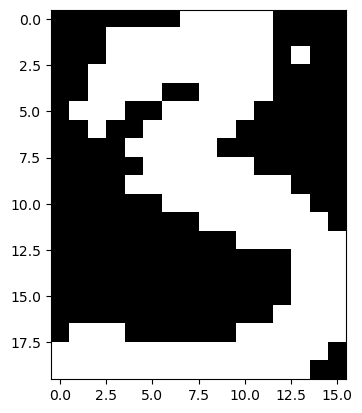

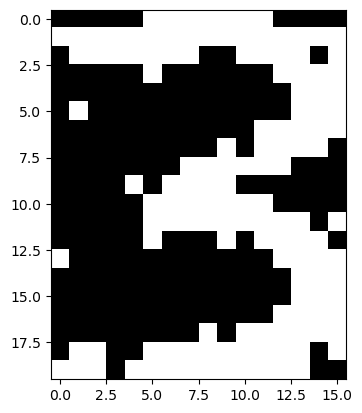

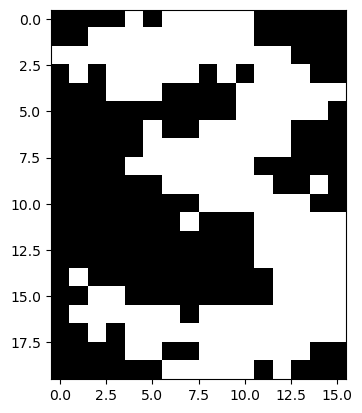

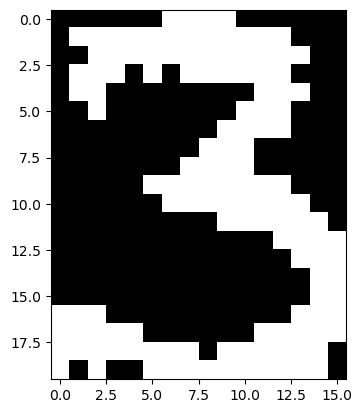

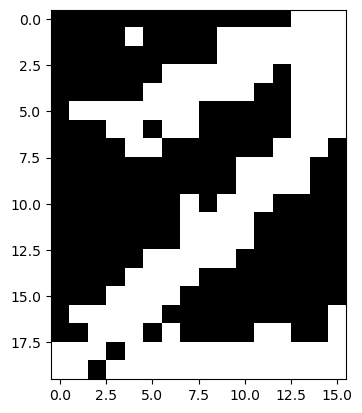

In [12]:
# Génération et affichage de la donnée générée
images = rbm.generer_image_RBM(num_images=num_images, num_iterations=200, image_size=size_img)
display_images(images, size_img)

#### Donnée générée après 1000 itérations

In [13]:
num_iterations = 1000

In [14]:
# Initialisation et entrainement sur 1000 itérations
rbm = RBM(pixels, n_hidden)
rbm.train_RBM(data=X, learning_rate=learning_rate, batch_size=batch_size, epochs=num_iterations, verbose=False)

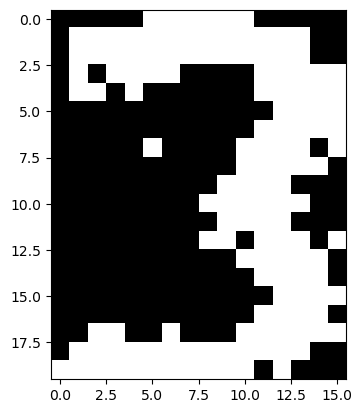

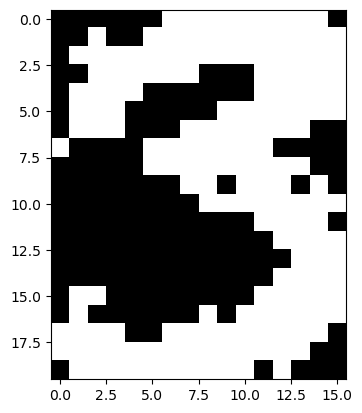

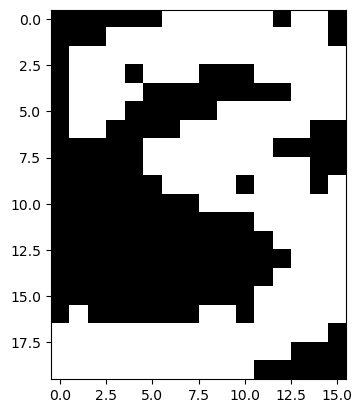

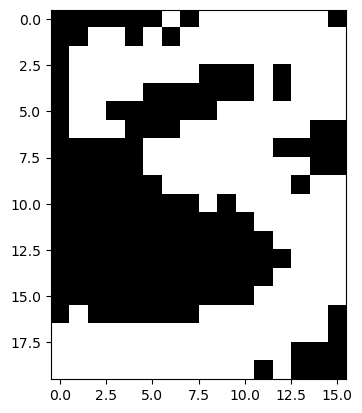

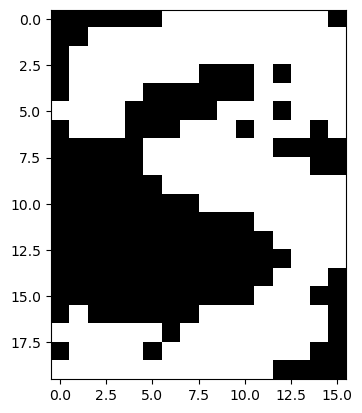

In [15]:
# Génération et affichage de la donnée générée
images = rbm.generer_image_RBM(num_images=num_images, num_iterations=200, image_size=size_img)
display_images(images, size_img)